# Imports

In [ ]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/6

In [ ]:
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/MachineLearning/ml_prod/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/MachineLearning/ml_prod/train.csv')

In [ ]:
train_data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


# basic Eda

In [ ]:
train_data.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
train_data['Is_Response'].value_counts()/len(train_data)

happy        0.681213
not happy    0.318787
Name: Is_Response, dtype: float64

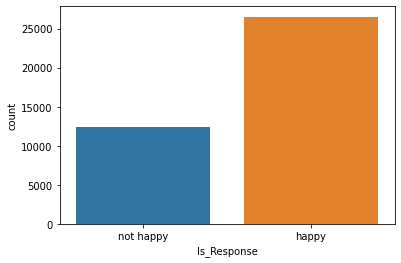

In [ ]:
sns.countplot(x=train_data['Is_Response'])
plt.show()

In [ ]:
train_data[train_data.duplicated()]

,User_ID,Description,Browser_Used,Device_Used,Is_Response


In [ ]:
train_data['Browser_Used'].value_counts()

Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64

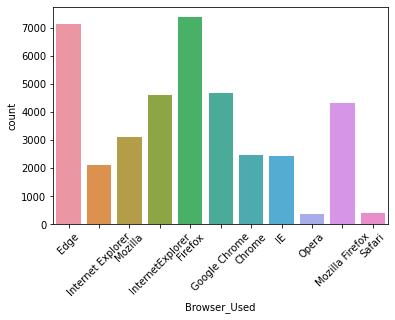

In [ ]:
sns.countplot(x=train_data['Browser_Used'])
plt.xticks(rotation=45)
plt.show()

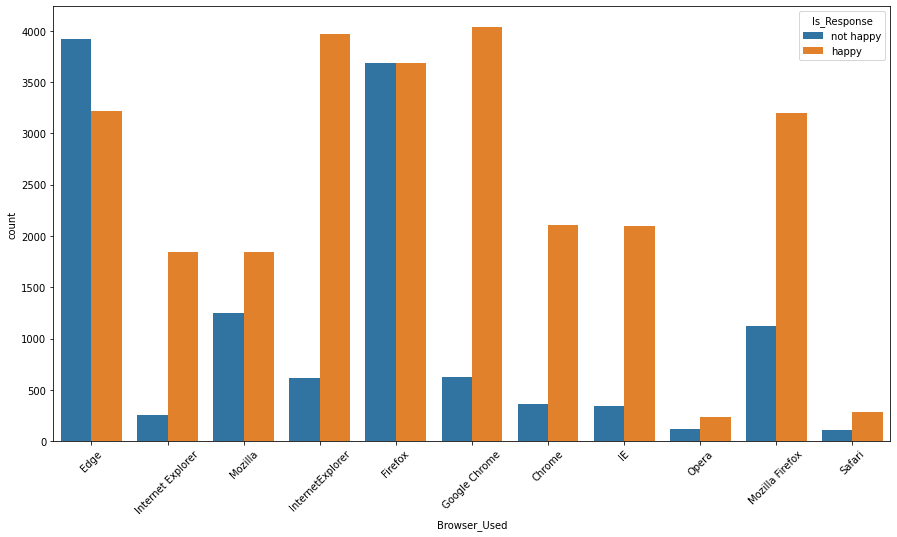

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train_data,x='Browser_Used',hue='Is_Response')
plt.xticks(rotation=45)
plt.show()

In [ ]:
train_data['Device_Used'].value_counts()

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64

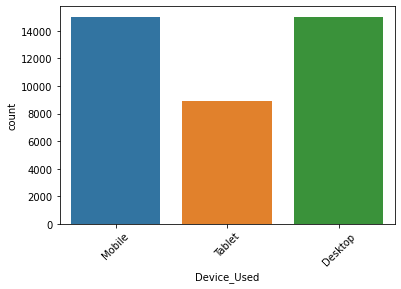

In [ ]:
sns.countplot(x=train_data['Device_Used'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
def check_response_distribution(subset_cols):

    print(train_data[train_data['Browser_Used'].isin(subset_cols)]
          ['Is_Response'].value_counts(normalize=True))

In [ ]:
check_response_distribution(['Mozilla Firefox'])

happy        0.740065
not happy    0.259935
Name: Is_Response, dtype: float64


In [ ]:
check_response_distribution(['Firefox'])

happy        0.500204
not happy    0.499796
Name: Is_Response, dtype: float64


In [ ]:
check_response_distribution(['Mozilla'])

happy        0.595408
not happy    0.404592
Name: Is_Response, dtype: float64


In [ ]:
check_response_distribution(['Firefox','Mozilla Firefox'])

happy        0.58897
not happy    0.41103
Name: Is_Response, dtype: float64


In [ ]:
check_response_distribution(['IE','Internet Explorer'])

happy        0.86834
not happy    0.13166
Name: Is_Response, dtype: float64


In [ ]:
check_response_distribution(['IE','InternetExplorer'])

happy        0.863242
not happy    0.136758
Name: Is_Response, dtype: float64


In [ ]:
check_response_distribution(['IE'])

happy        0.860599
not happy    0.139401
Name: Is_Response, dtype: float64


In [ ]:
train_data[train_data['Browser_Used'].isin(['Chrome'])]['Is_Response'].value_counts(normalize=True)

happy        0.851417
not happy    0.148583
Name: Is_Response, dtype: float64

In [ ]:
train_data[train_data['Browser_Used'].isin(['Google Chrome'])]['Is_Response'].value_counts(normalize=True)

happy        0.866066
not happy    0.133934
Name: Is_Response, dtype: float64

In [ ]:
train_data[train_data['Browser_Used'].isin(['Edge'])]['Is_Response'].value_counts(normalize=True)

not happy    0.548921
happy        0.451079
Name: Is_Response, dtype: float64

In [ ]:
train_data[train_data['Browser_Used'].isin(['Opera'])]['Is_Response'].value_counts(normalize=True)

happy        0.665746
not happy    0.334254
Name: Is_Response, dtype: float64

In [ ]:
train_data[train_data['Browser_Used'].isin(['Safari'])]['Is_Response'].value_counts(normalize=True)

happy        0.728205
not happy    0.271795
Name: Is_Response, dtype: float64

## Merging Similar Browser used values

In [ ]:
map_dict = {'Google Chrome':'Chrome',
           'InternetExplorer':'IE',
           'Internet Explorer':'IE',
           'Mozilla Firefox':'Firefox',
           'Mozilla':'Firefox'}

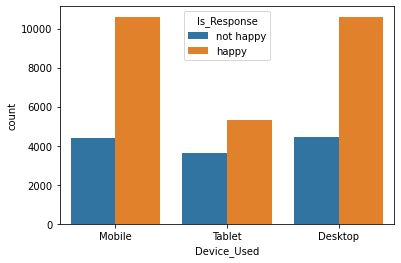

In [ ]:
sns.countplot(data=train_data,x='Device_Used',hue='Is_Response')
plt.show()

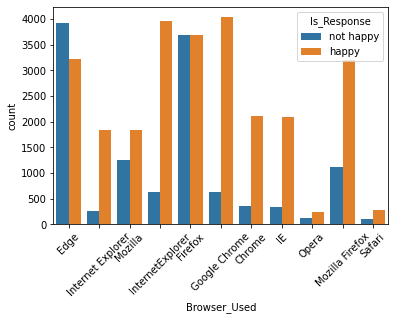

In [ ]:
sns.countplot(data=train_data,x='Browser_Used',hue='Is_Response')
plt.xticks(rotation=45)
plt.show()

In [ ]:
train_data['Description_wcount'] = train_data['Description'].apply(lambda x: len(x.split()))
train_data['Description_wcount'].describe()

count    38932.000000
mean       157.347555
std        131.056426
min          4.000000
25%         73.000000
50%        123.000000
75%        199.000000
max       2289.000000
Name: Description_wcount, dtype: float64

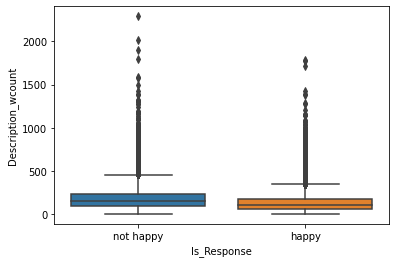

In [ ]:
sns.boxplot(data=train_data,y='Description_wcount',x='Is_Response')

In [ ]:
train_data[train_data['Description_wcount'] > 512].describe()

,Description_wcount
count,893.000000
mean,695.189250
std,206.991808
min,513.000000
25%,564.000000
50%,630.000000
75%,747.000000
max,2289.000000


1. \n -> with ' '
2. multiple """""""" with ''
3. numbers are replaced with --, -th, -st, --nd, --rd , to be replaced with ''
4. \' with ''

# Cleaning Data

In [ ]:
import re

In [ ]:
print(train_data['Description'].iloc[34])

Looking for a tranquil retreat in Denver that is close to great restaurants, shopping, the Botanic Gardens, the Art Museum in theCherry Creek neighborhood? This is the place!
We had read about slow parking valet times, but our waits for the retrieval of our car averaged two minutes! I suppose if you wanted your car during intervals of high turnover (check-in and check-out), it might takelonger. I suggest you ask the valet staff if you are concerned.
Back to the hotel room,we specified a room with mountain views and got a nice one. Large large bathroom with separate tub and bath appointed with marble floors and granite countertops. rooms facing west in the summer, you might want to leave your AC a little lower before you leave for dinner. Linens comfortable and pretty. The wallpaper was bold and dramatics...nice touch!
Hope to return soon for another relaxing stay...eat and drink at North restaurant...-- steps from the front door of JW Marriott. You will not be disappointed!


In [ ]:
re.sub(r'\.[\.]+'," ",train_data['Description'].iloc[34])

'Looking for a tranquil retreat in Denver that is close to great restaurants, shopping, the Botanic Gardens, the Art Museum in theCherry Creek neighborhood? This is the place!\r\nWe had read about slow parking valet times, but our waits for the retrieval of our car averaged two minutes! I suppose if you wanted your car during intervals of high turnover (check-in and check-out), it might takelonger. I suggest you ask the valet staff if you are concerned.\r\nBack to the hotel room,we specified a room with mountain views and got a nice one. Large large bathroom with separate tub and bath appointed with marble floors and granite countertops. rooms facing west in the summer, you might want to leave your AC a little lower before you leave for dinner. Linens comfortable and pretty. The wallpaper was bold and dramatics nice touch!\r\nHope to return soon for another relaxing stay eat and drink at North restaurant -- steps from the front door of JW Marriott. You will not be disappointed!'

In [ ]:
train_data['Description']=train_data['Description'].apply(lambda row:re.sub(r'\.[\.]+'," ",row))

In [ ]:
print(train_data['Description'].iloc[34].replace("\n","").replace("-",""))

Hope to return soon for another relaxing stay eat and drink at North restaurant  steps from the front door of JW Marriott. You will not be disappointed!


In [ ]:
train_data['Description'].iloc[7].replace("\n"," ")

"My wife & I stayed in this glorious city a while back. SF is expensive, but we found this little hotel in a super location for a very reasonable price. By no means is it a --star hotel, but the room was clean, nice & well-appointed with quaint charm, despite being a bit small. Regardless of that, the staff was very helpful. I particularly enjoyed the wine-tasting evenings & the helpful, polite front desk.\r Overall, I'd recommend this place for singles or couples, but for children present, you probably need a bit bigger room. For the location & proximity to everything (including a marvelous little Mexican restaurant around the corner), you can't beat this place for the price. SF is a magical city with plenty of things to do, so I'd recommend just crashing here & seeing the wonderful surroundings more than hanging out in a room all day.\r Would recommend again for a getaway for -, but not for families because of the room size."

In [ ]:
train_data['Description'].iloc[90]

"Just back from five nights in the Belvedere and felt the need to write in support of the hotel. Location cannot be faulted, short walk to the subway, Times Square and the theatres on Broadway. Our room had a kingsize bed and was on the --th floor it faced the back of the hotel, it was extremely quiet and the view was good. The room was very spacious and much larger than I thought it would be having read some previous reviews. It was also in good decorative order. Yes the bathroom was quite small, but just how much time do you spend in a bathroom when there's so much to see and do in New York. Housekeeping was excellent.\r\nThe price represented excellent value for money and this comes from someone who never books anywhere without first checking up on tripadvisor."

In [ ]:
train_data['Description'].str.replace('\n', ' ')

0        The room was kind of clean but had a VERY stro...
1        I stayed at the Crown Plaza April -- - April -...
2        I booked this hotel through Hotwire at the low...
3        Stayed here with husband and sons on the way t...
4        My girlfriends and I stayed here to celebrate ...
                               ...                        
38927    We arrived late at night and walked in to a ch...
38928    The only positive impression is location and p...
38929    Traveling with friends for shopping and a show...
38930    The experience was just ok. We paid extra for ...
38931    The Westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [ ]:
def map_browser(df):
    
    
    df['Browser_Used'] = df['Browser_Used'].replace(map_dict)

    return df

In [ ]:
def clean_desc(df:pd.DataFrame):
    
    df['Description'] = df['Description'].str.replace('\n',"").replace(r'\$*--(th|st|rd|nd)*|("")+','',regex=True)
    
    return df

In [ ]:
def preprocess(df):
    
    df = map_browser(df)
    df = clean_desc(df)
    
    return df

In [ ]:
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [ ]:
train_data['Description_wcount'].describe()

count    38932.000000
mean       157.347555
std        131.056426
min          4.000000
25%         73.000000
50%        123.000000
75%        199.000000
max       2289.000000
Name: Description_wcount, dtype: float64

In [ ]:
train_data['Is_Response']=train_data['Is_Response'].apply(lambda res: 0 if res=='not happy' else 1)
test_data['Is_Response']=test_data['Is_Response'].apply(lambda res: 0 if res=='not happy' else 1)

In [ ]:
X_train=train_data['Description']
y_train=train_data['Is_Response']
X_test=test_data['Description']
y_test=test_data['Is_Response']

In [71]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
X_train=X_train.apply(lambda review:" ".join(review.split()[:200]))
X_test=X_test.apply(lambda review:" ".join(review.split()[:200]))

In [ ]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 200

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


In [ ]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 200)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 200)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 200)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 200, 768)]                'input_mask[0][0]',         

In [ ]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

<pre><font size=6>Part-3: Tokenization</font></pre>

In [ ]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00


In [66]:
import tokenization #We have given tokenization.py file
from tokenization import FullTokenizer

In [69]:
# if you are getting error for sentencepiece module you can install it using below command while running this cell for the first time
#!pip install sentencepiece
tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case )

In [67]:
def data_prepration(df,tokenizer,max_seq_length):
  max_len=max_seq_length
  tokens=[tokenizer.tokenize(text) for text in df.values]
  tokens=[token[:max_len-2] if len(token)>max_len-2 else token for token in tokens]
  tokens=[['[CLS]',*token,'[SEP]'] for token in tokens]

  X_mask=np.array([([1]*len(token))+[0]*(max_len-len(token)) for token in tokens])
  X_segment=np.zeros((len(df),max_len))

  tokens=np.array([token+['[PAD]']*(max_len-len(token)) if len(token)<max_len else token for token in tokens])
  X_tokens=np.array([tokenizer.convert_tokens_to_ids(token) for token in tokens])
  return X_tokens,X_mask,X_segment

In [72]:
X_train_tokens, X_train_mask, X_train_segment=data_prepration(X_train,tokenizer,max_seq_length)
X_test_tokens, X_test_mask, X_test_segment=data_prepration(X_test,tokenizer,max_seq_length)

In [76]:
# import pickle
# ##save all your results to disk so that, no need to run all again. 
# pickle.dump((X_train, X_train_tokens, X_train_mask, X_train_segment, y_train),open('/content/drive/MyDrive/MachineLearning/ml_prod/arrays_data/train_data.pkl','wb'))
# pickle.dump((X_test, X_test_tokens, X_test_mask, X_test_segment, y_test),open('/content/drive/MyDrive/MachineLearning/ml_prod/arrays_data/test_data.pkl','wb'))

In [ ]:
#you can load from disk
X_train, X_train_tokens, X_train_mask, X_train_segment, y_train = pickle.load(open("/content/drive/MyDrive/MachineLearning/ml_prod/arrays_data/train_data.pkl", 'rb')) 
X_test, X_test_tokens, X_test_mask, X_test_segment, y_test = pickle.load(open("/content/drive/MyDrive/MachineLearning/ml_prod/arrays_data/test_data.pkl", 'rb')) 

<pre><font size=6>Part-4: Getting Embeddings from BERT Model</font>
We already created the BERT model in the part-2 and input data in the part-3. 
We will utlize those two and will get the embeddings for each sentence in the 
Train and test data.</pre>

In [77]:
# get the train output, BERT model will give one output so save in
# X_train_pooled_output
#this cell will take some time to execute, make sure thay you have stable internet connection
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

1217/1217 [==============================] - 542s 443ms/step


In [78]:
# get the test output, BERT model will give one output so save in
# X_test_pooled_output
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

1217/1217 [==============================] - 546s 449ms/step


In [79]:
# ##save all your results to disk so that, no need to run all again. 
# pickle.dump((X_train_pooled_output, X_test_pooled_output),open('/content/drive/MyDrive/MachineLearning/ml_prod/arrays_data/final_output.pkl','wb'))

In [ ]:
X_train_pooled_output, X_test_pooled_output= pickle.load(open('/content/drive/MyDrive/MachineLearning/ml_prod/arrays_data/final_output.pkl', 'rb'))

In [80]:
X_train_pooled_output.shape

(38932, 768)

In [81]:
X_test_pooled_output.shape

(38932, 768)

In [88]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2',solver='newton-cg',C=1,random_state=0).fit(X_train_pooled_output, y_train)
y_pred=clf.predict(X_test_pooled_output)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [89]:
clf.score(X_test_pooled_output, y_train)

0.8658686941333608